In [1]:
import scipy.io
import numpy as np
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [2]:
mountain = scipy.io.loadmat('points_mountain.mat')
hyperbolas = scipy.io.loadmat('points_hyperbolas.mat')
cylinder = scipy.io.loadmat('points_cylinder.mat')

In [3]:
mountain = mountain['points_mountain']
hyperbolas = hyperbolas['points_hyperbolas']
cylinder = cylinder['points_cylinder']

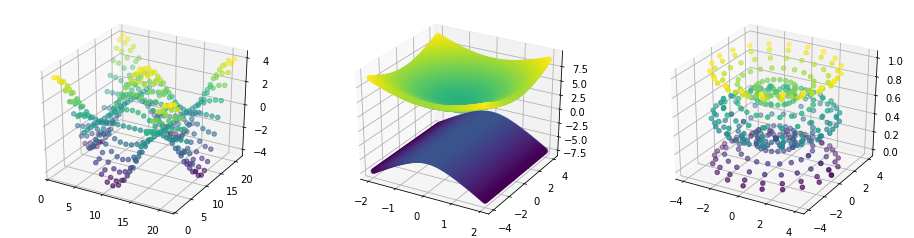

In [4]:
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain[:,0], mountain[:,1], mountain[:,2], c=mountain[:,2])

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(hyperbolas[:,0], hyperbolas[:,1], hyperbolas[:,2], c = hyperbolas[:,2])

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(cylinder[:,0],cylinder[:,1],cylinder[:,2], c=cylinder[:,2])

plt.show()

In [5]:
n_components = 2
method = 'standard' #can be changed to 'hessian'

In [6]:
#starting from 3D has no sense to crossvalidate on the number of output dimensions. Let's crossvalidate only on the 
#number of neighbours parameter.

def compute_err(n_neighbors):

    embed_mount = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                                 eigen_solver='auto',
                                                 method=method)
    embed_hyper = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                                 eigen_solver='auto',
                                                 method=method)
    embed_cyl = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                                 eigen_solver='auto',
                                                 method=method)

    y_mountain = embed_mount.fit_transform(mountain)
    y_hyperbolas = embed_hyper.fit_transform(hyperbolas)
    y_cylinder = embed_cyl.fit_transform(cylinder)
    
    return embed_mount.reconstruction_error_, embed_hyper.reconstruction_error_, embed_cyl.reconstruction_error_
    

100%|██████████| 8/8 [04:04<00:00, 30.57s/it]


Text(0.5,1,'Reconstruction error with respect to n_neighbors')

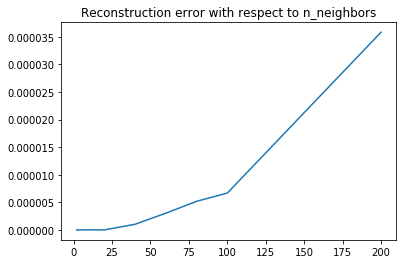

In [7]:
array_neighbors = [2,10,20,40,60,80,100,200]
err = []
for n in tqdm(array_neighbors):
    err.append(compute_err(n))
    
to_compare = np.sum(np.abs(err),axis=1)
plt.plot(array_neighbors,to_compare)
plt.title('Reconstruction error with respect to n_neighbors')

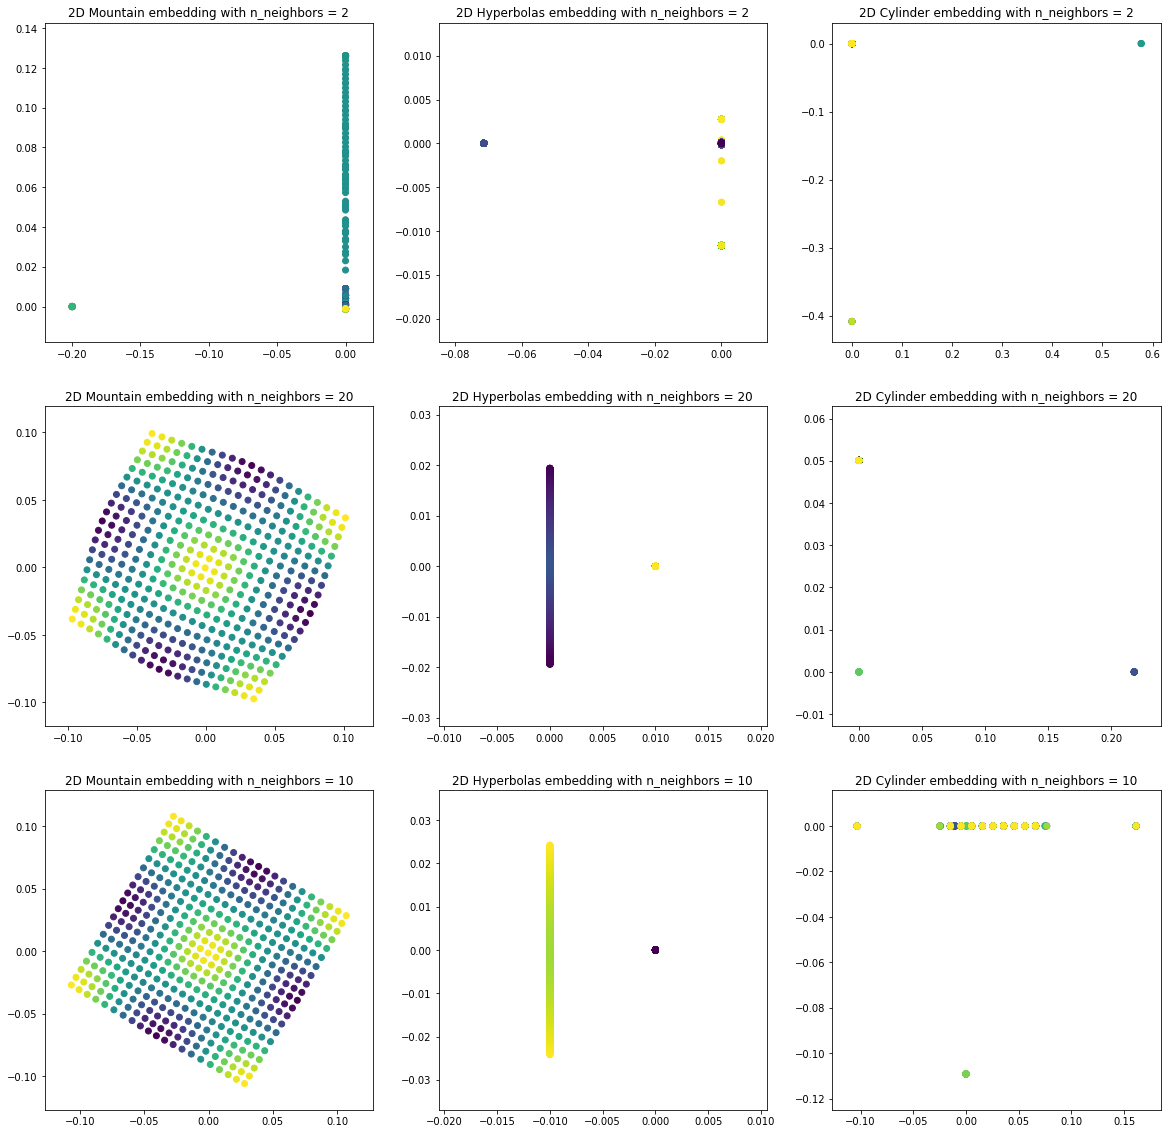

In [8]:
indices = np.argsort(to_compare)
numb_to_keep = 3 #keeping the 3 best values for n_neighbors
fig = plt.figure(figsize = (20,20))
i = 0
for k in indices[0:numb_to_keep]:
    n_neighbors = array_neighbors[k]
    embeding = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                               eigen_solver='auto',
                                               method=method)

    y_mountain = embeding.fit_transform(mountain)
    y_hyperbolas = embeding.fit_transform(hyperbolas)
    y_cylinder = embeding.fit_transform(cylinder)

    i=i+1
    ax = fig.add_subplot(numb_to_keep, 3, i)
    ax.scatter(y_mountain[:,0], y_mountain[:,1], c=mountain[:,2])
    plt.title('{}D Mountain embedding with n_neighbors = {}'.format(n_components, n_neighbors))
    
    i=i+1
    ax2 = fig.add_subplot(numb_to_keep, 3, i)
    ax2.scatter(y_hyperbolas[:,0], y_hyperbolas[:,1], c = hyperbolas[:,2])
    plt.title('{}D Hyperbolas embedding with n_neighbors = {}'.format(n_components, n_neighbors))

    i=i+1
    ax3 = fig.add_subplot(numb_to_keep, 3, i)
    ax3.scatter(y_cylinder[:,0],y_cylinder[:,1], c=cylinder[:,2])
    plt.title('{}D Cylinder embedding with n_neighbors = {}'.format(n_components, n_neighbors))
    
plt.show()